<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Cleaning, EDA

# Introduction

## Background

In the current fast paced society, it is increasingly costly and pressurising to do research and to advance. [“As grants become increasingly selective, scientists must spend more time writing proposals, leading to ‘crippling demands’ that subtract time from thinking, reading, and conducting research.”](https://siepr.stanford.edu/publications/policy-brief/race-bottom-how-competition-publish-first-can-hurt-scientific-quality) Thus, researchers are in a high-pressure situation to be published in order to increase their reputation and hence increase their chances of securing funds. 
Scientific peer-reviewed journals themselves have a distinct reputation and scoring/indexing system. Thus, for a researcher, being published in which scientific journal associates the papers reputation with the journal’s reputation and vice versa. Ultimately however, any paper produced must clear the first bar of being accepted for the peer - review.
Therefore, for a researcher, there are two goals to be accomplished. Similar to getting a job, the first is to get through the first round of being accepted for peer-review and the second is to do so in a journal with the highest repute possible. 

* Impact factor is a well-known and common way to assess/denote the quality (or impact) of a scientific journal. Impact factor is based on the number of citations that articles published in that journal receive over time, with citations representing how often the work is referenced by other researchers (and hence their trust of it). The obvious disadvantages  is just one or a few highly cited papers can throw off the results so it doesn’t necessarily reflect the individual paper quality, as well as it takes at least three years’ worth of data to calculate.
* The H-Index (HI) value is the number of papers (h) published in a journal that have been cited at least h times. This quantifies both productivity (i.e. number of papers produced) and impact (number of citations) in a single number, sort of an average of a journals repute.

## Problem Statement

In this light, this project aims to investigate if there is a difference between papers published in two journals of differing reputation (HI), specifically the abstract which functions like the executive summary of a project like this very one. Natural Language Processing (NLP) would be used to train a classifier on which journal the papers’ abstracts came from, (‘high_HI’ and ‘low_HI’). This would then allow the exploration of the keywords that is distinct to the high_HI journal that would allow researchers to craft their abstract in a more targeted manner to improve their chance of acceptance by publishers of said journal. <br>
~* Effective classifying models will help to ensure that the texts used will be sufficiently different and help highlight the abstract of a researcher’s paper.~



## Approach in brief

<div style = "text-align: center; font-weight: bold; font-size: large;" >Journal used in acquiring data</div>

| Label   | Journal Name                           | H-Index | Impact factor | Link                                                                                                                                            |
|---------|----------------------------------------|---------|---------------|-------------------------------------------------------------------------------------------------------------------------------------------------|
| low_HI  | Journal of Analytical Chemistry        | 37       | 1.1 (2022)    | [Journal_Link](https://www.springer.com/journal/10809) <br> [H-Index_Link](https://www.scimagojr.com/journalsearch.php?q=24018&tip=sid&clean=0) |
| high_HI | Analytical and Bioanalytical Chemistry | 182     | 4.3 (2022)        | [Journal_Link](https://www.springer.com/journal/216) <br> [H-Index_Link](https://www.scimagojr.com/journalsearch.php?q=23913&tip=sid&clean=0)                                                                                                                                                 |

* Scrape the data of the journal using Beautiful Soup.
* Preprocess data with Regex and Lemmatizer
* Expoloratory Data analysis
* Use of Count vectoriser() with hyperparameter tuning.
* Use of Naive Bayes, Logistic Regression and Random Forest classifiers to classify the journals.
    * Naive Bayes will be chosen for the preliminary training since it is known to be suited to text classification.
    * Logistic Regression to address potential data imbalance
    * A non-parametric method (Random Forest) as well as other modelling approaches to refine modelling. 
* F1_score being the harmonic mean between precision and recall is used as the performance metric since it is equally important to be able to use the keywords to avoid and to have as well.

## Data Dictionary

### Codebook / Data Dictionary
|        Feature Name       |                        Feature Description per data source                        |
|:-------------------------:|:---------------------------------------------------------------------------------:|
| title                     |  title of the paper                                                               |
| issue                     |  issue of the paper (Mon YYYY, issue #)                                           |
| issue_href                |  partial url of the issue derived from scraping                                   |
| url                       |  url of the paper                                                                 |
| content_type              |  description of what type of paper was published                                  |
| publish_date              |  date submittted for review and publication                                       |
| abstract                  |  abstract of the paper                                                            |

# Imports

In [1]:
# imports

import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#imports for preprocessing
import re
from sklearn.feature_extraction.text import CountVectorizer

#
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option('display.max_rows', 100)

In [2]:
#import data with correct encoding set.
high = pd.read_csv('data/high_journal.csv', encoding = 'utf-8' )
low = pd.read_csv('data/low_journal.csv', encoding = 'utf-8' )

In [3]:
high.to_csv('test_encode.csv', encoding='utf-8', index=False)
low.to_csv('test_encode2.csv', encoding='utf-8', index=False)
low

,title,issue,issue_href,url,content_type,publish_date,abstract
0,Optical Multisensor Systems in Analytical Spec...,"March 2022, issue 3",/journal/10809/volumes-and-issues/77-3,https://link.springer.com/article/10.1134/S106...,"('REVIEWS',)",31 March 2022,A review of works in developing optical multis...
1,Liquid–Liquid Extraction of Organic Compounds ...,"August 2021, issue 8",/journal/10809/volumes-and-issues/76-8,https://link.springer.com/article/10.1134/S106...,"('REVIEWS',)",29 July 2021,Single-drop microextraction (SDME) and hollow-...
2,"Determination of Lanthanides in Coal Fly Ash, ...","February 2021, issue 2",/journal/10809/volumes-and-issues/76-2,https://link.springer.com/article/10.1134/S106...,"('ARTICLES',)",23 February 2021,A method has been developed for the separation...
3,Application of Atmospheric Pressure Photoioniz...,"December 2020, issue 13",/journal/10809/volumes-and-issues/75-13,https://link.springer.com/article/10.1134/S106...,"('ARTICLES',)",20 December 2020,The behavior of eight nitrogen-containing toxi...
4,Simultaneous Determination of Sulfur Mustard A...,"August 2020, issue 8",/journal/10809/volumes-and-issues/75-8,https://link.springer.com/article/10.1134/S106...,"('ARTICLES',)",31 July 2020,We propose a procedure for the simultaneous de...
...,...,...,...,...,...,...,...
3607,New modified electrodes for the separate deter...,"February 2000, issue 2",/journal/10809/volumes-and-issues/55-2,https://link.springer.com/article/10.1007/BF02...,Articles,February 2000,"Nylon, chitin, polyvinyl chloride, and polymet..."
3608,Coulometric determination of lead(II) and lead...,"February 2000, issue 2",/journal/10809/volumes-and-issues/55-2,https://link.springer.com/article/10.1007/BF02...,Articles,February 2000,The behavior of Pb(II) and Pb(IV) was studied ...
3609,Continuous flow analysis: Photometric determin...,"February 2000, issue 2",/journal/10809/volumes-and-issues/55-2,https://link.springer.com/article/10.1007/BF02...,Articles,February 2000,The effect of microwave and ultraviolet radiat...
3610,Bioassay techniques: Problems concerning the s...,"February 2000, issue 2",/journal/10809/volumes-and-issues/55-2,https://link.springer.com/article/10.1007/BF02...,Articles,February 2000,A new biochemical approach was developed in or...


# Check data & clean
* Cursory check
* [Duplicate check](Duplicate-check)
* [Encoding or other text issues](Encoding-or-other-text-issues)

Title data is used only as a counter check and woul not factor into the abstract since the words would be duplicating the text already in the abstract.

In [4]:
high.head(2)

,title,issue,issue_href,url,content_type,publish_date,abstract
0,Enzyme-targeted near-infrared fluorescent prob...,"August 2023, issue 20",/journal/216/volumes-and-issues/415-20,https://link.springer.com/article/10.1007/s002...,Paper in Forefront,12 July 2023,Pesticide residues significantly affect food s...
1,A numerical study on microfluidic devices to m...,"August 2023, issue 20",/journal/216/volumes-and-issues/415-20,https://link.springer.com/article/10.1007/s002...,Paper in Forefront,29 June 2023,Determining the physical and chemical properti...


In [5]:
low.head(2)

,title,issue,issue_href,url,content_type,publish_date,abstract
0,Optical Multisensor Systems in Analytical Spec...,"March 2022, issue 3",/journal/10809/volumes-and-issues/77-3,https://link.springer.com/article/10.1134/S106...,"('REVIEWS',)",31 March 2022,A review of works in developing optical multis...
1,Liquid–Liquid Extraction of Organic Compounds ...,"August 2021, issue 8",/journal/10809/volumes-and-issues/76-8,https://link.springer.com/article/10.1134/S106...,"('REVIEWS',)",29 July 2021,Single-drop microextraction (SDME) and hollow-...


In [6]:
#check for nulls, check for type
print(high.info())
print(low.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15073 entries, 0 to 15072
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         15073 non-null  object
 1   issue         15073 non-null  object
 2   issue_href    15073 non-null  object
 3   url           15073 non-null  object
 4   content_type  15073 non-null  object
 5   publish_date  15073 non-null  object
 6   abstract      15073 non-null  object
dtypes: object(7)
memory usage: 824.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         3612 non-null   object
 1   issue         3612 non-null   object
 2   issue_href    3612 non-null   object
 3   url           3612 non-null   object
 4   content_type  3612 non-null   object
 5   publish_date  3612 non-null   object
 6   abstract      3612 n

Cursory inspection shows data in an acceptable format, some features such as url will need to be eventuall dropped and others such as href may be cleaned for use in other features.

It is noted that the high dataset has around 5 times more data than the low data, representing a data imbalance that will have to be dealth with later.

Convert date format

In [7]:
#convert date
#convert date time
high['publish_date'] = pd.to_datetime(high['publish_date'])
low['publish_date'] = pd.to_datetime(low['publish_date'])

## Duplicate check

In [8]:
#check duplicates in abstract
print(low.duplicated(subset = 'title').sum())
print(high.duplicated(subset = 'title').sum())

44
2


In [9]:
#check duplicates in url
print(low.duplicated(subset = 'url').sum())
print(high.duplicated(subset = 'url').sum())

15
0


In [10]:
#check duplicates in abstract
print(low.duplicated(subset = 'abstract').sum())
print(high.duplicated(subset = 'abstract').sum())

32
0


It seems like there may have been an error in the data_grab or concat process resulting in duplicates with 15 duplicate urls.
At the same time, there are still 17 more duplicate abstract with different unqique urls. 

Addtionally, there are 12 more duplicates in 'title' of different papers than the 'url' and the 'abstract', indicating that it should be a different paper with different abstract. There may be an issue with the papers itself so a more indepth check is prudent.

Since abstract will be used, any duplicated may skew the results so dopping by abstract alone should leave 17 duplicated titles. (32-15 = 17)

In [11]:
low.drop_duplicates(subset = 'abstract', keep = 'first', inplace = True)

#check duplicates in title
print(low.duplicated(subset = 'title').sum())
print(high.duplicated(subset = 'title').sum())

17
2


### High Journal
- Visually inspect differences of abstract
- Check for word differences (<10% difference)
- Drop definite duplicates

In [12]:
#check duplicates in title
print(low.duplicated(subset = 'title').sum())
print(high.duplicated(subset = 'title').sum())

17
2


In [13]:
#slice by duplicated titles
dup0_slice_high = high[high['title'] == high[high.duplicated(subset = 'title')].title.to_list()[0]]
dup0_slice_high

,title,issue,issue_href,url,content_type,publish_date,abstract
3419,Characterization of the NISTmAb Reference Mate...,"March 2018, issue 8",/journal/216/volumes-and-issues/410-8,https://link.springer.com/article/10.1007/s002...,Research Paper,2018-02-09,Both conformational and colloidal stability of...
3420,Characterization of the NISTmAb Reference Mate...,"March 2018, issue 8",/journal/216/volumes-and-issues/410-8,https://link.springer.com/article/10.1007/s002...,Research Paper,2018-02-08,Protein-protein interactions in monoclonal ant...


In [14]:
#call out the abstract of each duplicate
high_dup_0 = dup0_slice_high['abstract'].to_list()[0]
high_dup_1 = dup0_slice_high['abstract'].to_list()[1]
print(f"Duplicate 1 text:\n{high_dup_0} \n")
print(f"Duplicate 2 text:\n{high_dup_1}\n\n")

#remove by sets
word_diff = set(high_dup_0.split()).symmetric_difference(set(high_dup_1.split()))
pct_diff = len(word_diff)/len(high_dup_0)

#tokenize the text string and seperate by sets
print(f"Different words: {pct_diff*100:.2f}%")

Duplicate 1 text:
Both conformational and colloidal stability of therapeutic proteins must be closely monitored and thoroughly characterized to assess the long-term viability of drug products. We characterized the IgG1 NISTmAb reference material in its histidine formulation buffer and report our findings on the higher order structure and interactions of NISTmAb under a range of conditions. In this paper we present the analysis of experimental small-angle scattering data with atomistic molecular simulations to characterize the monodisperse dilute solution of NISTmAb. In part II we describe the characterization of the NISTmAb at high protein concentration (Castellanos et al. 2018). The NISTmAb was found to be a flexible protein with a radius of gyration of 49.0 ± 1.2 Å in histidine formulation buffer using a variety of neutron and X-ray scattering measurements. Scattering data were then modeled using molecular simulation. After building and validating a starting NISTmAb structure from th

While the text is vastly different, it seems to be referring to the same things but unfortunately, it would require techincal knowledge to understand and differentiate it. However, given the context of the same time and similar dates, it may be a reworded abstract of the same paper. With more than 10% difference in the text this seems to be the case. Nevertheless, the fact that the text is vastly different so it would not be dropped in hopes that it would function as another line in our corpus since the word order seems to be different.

These checks will be repeated for the low data. witht the same level idea a relatively lenient threshold of 10% is set to ensure that texts which are sufficiently reordered can be kept and only those with very direct changes dropped.

In [15]:
drop_list = dup0_slice_high.index.to_list()
high.drop(drop_list[-1], inplace = True)

### Low Journal
- Visually inspect differences of abstract
- Check for word differences (<10% difference)
- Drop definite duplicates


#### Sampled Individual Check

In [16]:
#repeat for low
dup0_slice_low = low[low['title'] == low[low.duplicated(subset = 'title')].title.to_list()[0]]
dup0_slice_low

,title,issue,issue_href,url,content_type,publish_date,abstract
288,Methodological Aspects of Analytical Chemistry,"May 2021, issue 5",/journal/10809/volumes-and-issues/76-5,https://link.springer.com/article/10.1134/S106...,LETTER TO THE EDITOR,2021-05-13,Some general aspects of modern analytical chem...
333,Methodological Aspects of Analytical Chemistry,"January 2021, issue 1",/journal/10809/volumes-and-issues/76-1,https://link.springer.com/article/10.1134/S106...,REVIEWS,2021-02-13,The author considers the definition of analyti...


In [17]:
low_dup0_0 = dup0_slice_low['abstract'].to_list()[0]
low_dup0_1 = dup0_slice_low['abstract'].to_list()[1]
print(f"Duplicate 1 text:\n{low_dup0_0}\n")
print(f"Duplicate 2 text:\n{low_dup0_1}\n")

pct_diff = len(set(low_dup0_0.split()).symmetric_difference(set(low_dup0_1.split())))/len(low_dup0_0)

#tokenize the text string and seperate by sets
print(f"Different words: {pct_diff*100:.1f}% \n")

Duplicate 1 text:
Some general aspects of modern analytical chemistry were considered, especially the definition of this science. Big data and imaging techniques as areas beloging to analytical chemistry were also discussed.

Duplicate 2 text:
The author considers the definition of analytical chemistry and discusses issues about what is this science, fundamental or applied. The reasons for the stimuli and drivers for the development of analytical chemistry, its place in the system of scientific knowledge, and its internal structure are presented. The question whether the name “analytical chemistry” is often replaced by other terms, better corresponding to the current status of this science, is also discussed.

Different words: 27.7% 



In [18]:
dup1_slice_low = low[low['title'] == low[low.duplicated(subset = 'title')].title.to_list()[1]]
dup1_slice_low

,title,issue,issue_href,url,content_type,publish_date,abstract
2176,Solid phase extraction of trace amounts of ura...,"April 2011, issue 4",/journal/10809/volumes-and-issues/66-4,https://link.springer.com/article/10.1134/S106...,Articles,2011-04-09,A simple and reliable method has been develope...
2219,Solid phase extraction of trace amounts of ura...,"January 2011, issue 1",/journal/10809/volumes-and-issues/66-1,https://link.springer.com/article/10.1134/S106...,Articles,2011-01-08,A simple and reliable method has been develope...


In [19]:
#call out the abstract of each duplicate
low_dup1_0 = dup1_slice_low['abstract'].to_list()[0]
low_dup1_1 = dup1_slice_low['abstract'].to_list()[1]
print(f"Duplicate 1 text:\n{low_dup1_0}\n")
print(f"Duplicate 2 text:\n{low_dup1_1}\n")
#pct different
pct_diff = len(set(low_dup1_0.split()).symmetric_difference(set(low_dup1_1.split())))/len(low_dup1_1)

#tokenize the text string and seperate by sets
print(f"Different words: {pct_diff*100:.1f}% \n")

Duplicate 1 text:
A simple and reliable method has been developed for the determination of uranium(VI). The method is based on the separation and preconcentration of uranium(VI) using a column packed with 8-hydroxyquinoline immobilized on surfactant coated alumina prior to its spectrophotometric determination with arsenazo III. The effect of pH, sample flow rate and volume, elution conditions, and foreign ions on the sorption of uranium(VI) has been investigated. A preconcentration factor of 200 was achieved by passing 1000 mL of sample through the column. The relative standard deviation for 10 replicate analyses at the 100 ng/mL level of uranium(VI) was 2.1% and the detection limit was 0.12 ng/mL. The method was success-fully applied to the determination of uranium in natural water samples. The accuracy was assessed through recovery experiments and the analysis of a certified reference material.

Duplicate 2 text:
A simple and reliable method has been developed for the determination o

In the first case, the abstract is different, and the content_type makes the reason obvious, one is a review, another is a letter to the editor, which is significantly difference so both will be kept.

In the second case, the abstract does look the same but yet it does not show up when checked for duplictates, the abstracts of each set of duplciates will be compared for word differences.

It is now evident that the duplicates had some slight differences in text formatting such as casing, lemma and word form, which indicates that it is more of an aesthetic difference. Since it is marked by a difference in time, it is assumed that the second version was intended as a correction, therefore, the chronologically earlier duplicate would be dropped. 



Both have very different percentages of words. The rest of the test will be sorted with a loop and subsequently cleaned up at once.

#### Batch processing
- Use `for` loop to go through the rest

In [20]:
#repeat for low df
duplicates = low[low.duplicated(subset = 'title')].title.to_list()
drop_list =[]

for i, duplicate in enumerate(duplicates):
    #slice out the duplicates for i
    dup_slice_low = low[low['title'] == duplicate]

    #seperate each duplicated line in for comparison.
    low_dup0 = dup_slice_low['abstract'].to_list()[0]
    low_dup1 = dup_slice_low['abstract'].to_list()[1]

    #tokenize the text string and seperate by sets
    word_diff = set(low_dup0.split()).symmetric_difference(set(low_dup1.split()))
    pct_diff = len(word_diff)/len(low_dup0)
    print(f"Duplicate no. {i+1} has {pct_diff*100:.2f}% different words.")
    
    #add index for duplicates to be dropped.
    if pct_diff <= 0.1:
        duplicate_list = dup_slice_low.index.to_list()
        drop_list.append(duplicate_list[-1])
        print(f'Duplicate no. {i+1} added to drop_list')
print(drop_list) 

Duplicate no. 1 has 27.67% different words.
Duplicate no. 2 has 0.67% different words.
Duplicate no. 2 added to drop_list
Duplicate no. 3 has 0.97% different words.
Duplicate no. 3 added to drop_list
Duplicate no. 4 has 1.37% different words.
Duplicate no. 4 added to drop_list
Duplicate no. 5 has 1.33% different words.
Duplicate no. 5 added to drop_list
Duplicate no. 6 has 0.54% different words.
Duplicate no. 6 added to drop_list
Duplicate no. 7 has 0.32% different words.
Duplicate no. 7 added to drop_list
Duplicate no. 8 has 0.90% different words.
Duplicate no. 8 added to drop_list
Duplicate no. 9 has 0.99% different words.
Duplicate no. 9 added to drop_list
Duplicate no. 10 has 0.83% different words.
Duplicate no. 10 added to drop_list
Duplicate no. 11 has 0.82% different words.
Duplicate no. 11 added to drop_list
Duplicate no. 12 has 0.40% different words.
Duplicate no. 12 added to drop_list
Duplicate no. 13 has 1.04% different words.
Duplicate no. 13 added to drop_list
Duplicate no

In [21]:
#drop
print(low.shape)
low.drop(drop_list, inplace = True)
low.shape

(3580, 7)


(3564, 7)

## Encoding, non-texts issues, typos
Check for any encoding issues and non-texts issues that are present e.g. formulas, casing as well as typos of the content_type

### Encoding & formulas issues
- Encoder is double check to ensure that the characters are correct and not generated due to encoding issues
- Regex used to remove scientific formulas within text that would not do well with tokenization later on.

In [22]:
low['abstract'][5]

'A simple, sensitive and efficient method based on hollow fiber liquid phase microextraction followed by high performance liquid chromatography has been developed for preconcentration and determination of trace carbamazepine, an antiepileptic drug, in aqueous and biological solutions.The main parameters affecting the extraction efficiency were studied using response surface methodology. Central composite design was performed at five levels of extraction time, pH and ionic strength. The final model showed good linearity and performance. The optimal conditions were observed at 48.5 min, 8.9 and 0.29 M for extraction time, pH and ionic strength, respectively. The calibration curve was linear in the range of 5–500 µg/L with correlation coefficient of 0.9999 and limit of detection of 2.8 µg/L. Finally, the applicability of the proposed method was evaluated by extraction and determination of the drug in aqueous and plasma samples. The intra- and inter-day coefficients of variation were less 

While skimming the text data using notepad (example above), it is noticed that some of the abstract have weird sequence strings (marked by escape characters \) within them. 

Checking the encoding use (utf-8) used and other text, it seems these are part of the data but are non-text items unrelated to encoding issues.

In this case, the precending and sentence has mentioned quadratic equations which is further supported by the mention of Bouguer—Lambert law and Beer law, indicating that these are mathematical formula representations that did not translate well when scrapped. In this case, considering that these are mathematical representations, it is better to omit such non-text representations.


In [23]:
#create function for removing mathematical formula representations using regex

def remove_formula(text):
    # Define a regex pattern to match formula expressions
    formula_pattern = r"\[?[^\[\]]+\]|\\\((.*?)\\\)|\\\[(.*?)\\\]|\$.*?\$"
    
    # Use re.sub to replace the matched expressions with an empty string
    cleaned_text = re.sub(formula_pattern, '', text)
    
    return cleaned_text

In [24]:
#trial apply function on each dataframe cell of abstract column
low['abstract'].apply(lambda x: remove_formula(x))[5]

'A simple, sensitive and efficient method based on hollow fiber liquid phase microextraction followed by high performance liquid chromatography has been developed for preconcentration and determination of trace carbamazepine, an antiepileptic drug, in aqueous and biological solutions.The main parameters affecting the extraction efficiency were studied using response surface methodology. Central composite design was performed at five levels of extraction time, pH and ionic strength. The final model showed good linearity and performance. The optimal conditions were observed at 48.5 min, 8.9 and 0.29 M for extraction time, pH and ionic strength, respectively. The calibration curve was linear in the range of 5–500 µg/L with correlation coefficient of 0.9999 and limit of detection of 2.8 µg/L. Finally, the applicability of the proposed method was evaluated by extraction and determination of the drug in aqueous and plasma samples. The intra- and inter-day coefficients of variation were less 

In [25]:
#apply function on each dataframe cell of abstract column
low['clean_abstract'] = low['abstract'].apply(lambda x: remove_formula(x))
high['clean_abstract'] = high['abstract'].apply(lambda x: remove_formula(x))
clean_low = low.drop(columns = 'abstract').rename(columns = {'clean_abstract' : 'abstract'})
clean_high = high.drop(columns = 'abstract').rename(columns = {'clean_abstract' : 'abstract'})

In [26]:
clean_low = low.drop(columns = 'abstract').rename(columns = {'clean_abstract' : 'abstract'})
clean_high = high.drop(columns = 'abstract').rename(columns = {'clean_abstract' : 'abstract'})

With this, the text data should be relatively clean enough in terms of word non-text but it is very possble that there exists some other forms of non-text that may be uncommon or rare. For those cases, after tokenization, if it does not occur frequently enough it should naturally be partitioned off into another cateogry. In any case, word case is still an issue.

### text casing
As the texts in the different features have proper sentences, there are some casing differences. In order to generalise the text, all will be converted to lowercase.

In [27]:
#check for casing difference
clean_high['content_type'].unique()

array(['Paper in Forefront', 'Research Paper', 'Communication', 'Trends',
       'Review', 'Critical Review', 'Feature Article', 'Research Article',
       'Rapid Communication', 'Note', 'PAPER IN FOREFRONT',
       'Original Paper',
       'ABCs of Education and Professional Development in Analytical Science',
       'Technical Note', 'Short Communication', 'Original paper',
       'ORIGINAL PAPER', 'Original Article', 'Paper in forefront',
       'Peper in Forefront', 'Technical Notes', 'Orignal Paper',
       'Industry News', 'Special Issue Paper', 'REVIEW',
       'Paper In Forefront', 'Spezial Issue Paper', 'Special issue paper',
       'Short communication', 'Discussion paper', 'Technical note',
       'Feature article', 'Review article',
       'Special issue paper – review'], dtype=object)

In [28]:
#trial applying lower casing
clean_high['content_type'].apply(str.lower)

0         paper in forefront
1         paper in forefront
2             research paper
3             research paper
4             research paper
                ...         
15068    special issue paper
15069    special issue paper
15070    special issue paper
15071    special issue paper
15072    special issue paper
Name: content_type, Length: 15072, dtype: object

In [29]:
#loop apply for selected columns
for col in ['title', 'content_type', 'abstract']:
    clean_high[col] = clean_high[col].apply(str.lower)
    clean_low[col] = clean_low[col].apply(str.lower)

In [30]:
clean_high['content_type'].unique()

array(['paper in forefront', 'research paper', 'communication', 'trends',
       'review', 'critical review', 'feature article', 'research article',
       'rapid communication', 'note', 'original paper',
       'abcs of education and professional development in analytical science',
       'technical note', 'short communication', 'original article',
       'peper in forefront', 'technical notes', 'orignal paper',
       'industry news', 'special issue paper', 'spezial issue paper',
       'discussion paper', 'review article',
       'special issue paper – review'], dtype=object)

### Typos of the content_type

Some typos, semantics differences spotted for 'content_type' in low dataset. Correction done according to [journal recommendations](https://www.springer.com/gp/authors-editors/authorandreviewertutorials/writing-a-journal-manuscript/types-of-journal-articles/10285504). 
https://www.springer.com/journal/216/updates/17235390

In [31]:
#check for further duplicates in content_type
print(f"Content types in high journal \n{'-'*29}\n{clean_high['content_type'].value_counts()}\n{'_'*29}\n")
print(f"Content types in low journal \n{'-'*29}\n{clean_low['content_type'].value_counts()}\n")

Content types in high journal 
-----------------------------
original paper                                                          5669
research paper                                                          5473
review                                                                  1303
paper in forefront                                                       710
special issue paper                                                      647
technical note                                                           341
trends                                                                   226
short communication                                                      219
note                                                                     208
communication                                                            101
rapid communication                                                       79
feature article                                                           56
critical review

In [32]:
#manual sort using journal references and some doamin knowledge
high_content_dict = {'research article': 'article',
                     'original paper': 'research paper',    
                     'paper in forefront': 'review',
                     'note': 'discussions',
                     'trends': 'article',
                     'technical note': 'discussions',
                     'communication': 'communication',
                     'rapid communication': 'communication',
                     'feature article':'article',
                     'short communication': 'communication',
                     'critical review': 'review',
                     'research article':'article',
                     'abcs of education and professional development in analytical science': 'article',
                     'original article': 'article',
                     'discussion paper': 'discussions',
                     'peper in forefront': 'review',
                     'technical discussionss': 'discussions',
                     'orignal paper': 'research paper',    
                     'industry news': 'communication',
                     'spezial issue paper': 'article',
                     'review article': 'review',
                     'special issue paper – review': 'review',
                     }
low_content_dict = {"articles": 'article',
                    "reviews": 'review',
                    "history of analytical chemistry": 'article',
                    "feature articles": 'article',
                    "rewievs": 'review',
                    "('articles',)": "article",
                    "analytical laboratories": 'research paper',
                    "letters to the editor": 'discussions',
                    "analytical equipment": 'research paper',
                    "analytical instruments": 'research paper',
                    "letters to the editor scientific discussions": 'discussions',
                    "consultations": 'review',
                    "('reviews',)": "review",
                    "letter to the editor": 'discussions',
                    "from the editor-in-chief": 'discussions',
                    "teaching analytical chemistry": 'article',
                    "new mass spectra": 'research paper',
                    "scientific personnel": 'discussions',
                    "analytical instrumentation": 'research paper',
                    "laboratory": 'review',
                    "critics and bibliography": 'discussions',
                    "rewiews": 'review',
                    "new mass spectra": 'research paper',
                    "teaching": 'article',
                    "discussions scientific discussions": 'discussions'
                    }

In [33]:
#loop through each value in dictionary to do string replacement.
for old, new in high_content_dict.items():
    clean_high['content_type'] = clean_high['content_type'].replace(old,new)

for old, new in low_content_dict.items():
    clean_low['content_type'] = clean_low['content_type'].replace(old,new)


In [34]:
#confirmation
print(f"Content types in high journal \n{'-'*29}\n{clean_high['content_type'].value_counts()}\n{'_'*32}\n")
print(f"Content types in high journal \n{'-'*29}\n{clean_low['content_type'].value_counts()}\n")

Content types in high journal 
-----------------------------
research paper         11143
review                  2044
special issue paper      647
discussions              551
communication            400
article                  286
technical notes            1
Name: content_type, dtype: int64
________________________________

Content types in high journal 
-----------------------------
article           3277
review             254
research paper      18
discussions         15
Name: content_type, dtype: int64



With the categories corrected and re-sorted, it is now possible to establish the truth values a.k.a the y variable and concatenate the data for export.

# Establishing 'Y'
Establish truth value Y by adding a column feature high_HI and imputing 1 for the high dataset and 0 for the low dataset.

In [35]:
#set Y value
clean_high['high_HI'] = 1
clean_low['high_HI'] = 0

In [36]:
combined_df = pd.concat([clean_low, clean_high], axis = 0)

In [37]:
combined_df.shape

(18636, 8)

In [38]:
if not os.path.exists('data/output'):
    os.makedirs('data/output')
pd.DataFrame(combined_df).to_csv('data/output/journal_df.csv', encoding = 'utf-8', index = False)

# EDA
* [Abstract length, word count and type](Abstract-length,-word-count-and-type)
* Distribution of abstract, type
* Most common words
* Other visualations
    * Barcharts of papers per type
    * Seaborn correlation heatmap
    * A seaborn pairplot
    * Word cloud
* Summary statistics 

* Are missing values imputed/handled appropriately?
* Are distributions examined and described?
* Are outliers identified and addressed?
* Are appropriate summary statistics provided?
* Are steps taken during data cleaning and EDA framed appropriately?
* Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?

## Abstract length, word count and type
Top 5 by words with length and type included

In [39]:
#abstract length
clean_high['abstract_length'] = clean_high['abstract'].apply(len)
clean_low['abstract_length'] = clean_low['abstract'].apply(len)

In [40]:
#abstract character count
clean_high['abstract_word_count'] = clean_high['abstract'].apply(lambda x: len(x.split()))
clean_low['abstract_word_count'] = clean_low['abstract'].apply(lambda x: len(x.split()))

In [41]:
#abstract length
combined_df['abstract_length'] = combined_df['abstract'].apply(len)

#abstract character count
combined_df['abstract_word_count'] = combined_df['abstract'].apply(lambda x: len(x.split()))

In [42]:
# top 5 longest and shortest abstracts of high
high_journal = combined_df[combined_df['high_HI'] == 1]
high_abstract = high_journal.sort_values(by = 'abstract_word_count', ascending = True)
top_bottom_high_abstract = high_abstract[:5].index.to_list() + high_abstract[-5:].index.to_list()
combined_high_word = combined_df.iloc[top_bottom_high_abstract].sort_values(by = 'abstract_word_count', ascending = True)
combined_high_word[['high_HI', 'abstract_length', 'abstract_word_count' ,'content_type', 'title', 'abstract']]

,high_HI,abstract_length,abstract_word_count,content_type,title,abstract
7834,1,577,82,review,recent advances in sulfotransferase enzyme act...,sulfotransferases are enzymes that catalyze th...
5201,1,619,88,research paper,counter-pressure-assisted itp with electrokine...,counter-pressure was used to extend the durati...
10071,1,905,128,research paper,a probabilistic approach to heroin signatures,the probability density functions of amount ra...
9169,1,972,129,review,analysis and characterization of heparin impur...,this review discusses recent developments in a...
9583,1,986,168,research paper,the isotopic mass defect: a tool for limiting ...,this paper describes the use of the relative i...
352,0,1214,179,article,"characterization of substituted 1,3-dioxolanes...","until recently, one of the reasons for the uns..."
8213,1,1376,190,research paper,a high throughput glucocerebrosidase assay usi...,glucocerebrosidase is a lysosomal enzyme that ...
10492,1,1456,204,research paper,toxicological study of pesticides in air and p...,a detailed toxicological study on several pest...
6784,1,1654,227,review,matching the laser wavelength to the absorptio...,a high analytical sensitivity in ultraviolet m...
8381,1,1886,256,research paper,drug detection in breath: effects of pulmonary...,breath analysis could offer a non-invasive mea...


From the above top 5 segments for the 'high' journal, it seems like research paper tends to be long but reviews but not definitively so. There is a mix of long and short reviews and articles so this feature benefit from a frequency analysis. Chracter counts ('abstract_length') and word count seems to be similar although there are some variation within in.

In [43]:
# top 5 longest and shortest abstracts of low
low_journal = combined_df[combined_df['high_HI'] == 0]
low_abstract = low_journal.sort_values(by = 'abstract_word_count', ascending = True)
top_bottom_low_abstract = low_abstract[:5].index.to_list() + low_abstract[-5:].index.to_list()
combined_low_word = combined_df.iloc[top_bottom_low_abstract].sort_values(by = 'abstract_word_count', ascending = True)
combined_low_word[['high_HI', 'abstract_length', 'abstract_word_count' ,'content_type', 'title', 'abstract']]

,high_HI,abstract_length,abstract_word_count,content_type,title,abstract
3399,0,80,13,article,"igor’ vladimirovich pyatnitskii, well-known uk...",main aspects and some results of the research ...
2324,0,292,39,article,distribution and solubility of 8-hydroxyquinol...,data on the distribution of 8-hydroxyquinoline...
3447,0,506,70,article,membrane electrodes selective for hydrogen pho...,the possibility of using plasticized polyvinyl...
2962,0,543,80,article,optical and chromaticity characteristics of co...,the optimum conditions of the complexation of ...
175,0,557,84,article,rapid detection of vegetable fat additives in ...,we studied a possibility of using direct analy...
217,0,602,89,article,titania-based adsorbents for hydrophilic inter...,stationary phases based on titania are obtaine...
1880,0,918,126,article,development of conditions for the derivatizati...,a method is described for increasing the sensi...
3172,0,943,133,article,differential catalytic determination of iridiu...,the kinetics of the oxidation of n-methyldiphe...
202,0,994,139,article,determination of solifenacin succinate in pure...,"four simple, precise and sensitive visible spe..."
156,0,1433,199,article,detection of trace amounts of explosives in th...,the effect of fingerprint sweat deposits on th...


From the above top 5 segments for the 'low' journal, articles have the longest word counts while articles and review seemingly have very short abstracts. We can look at the summary statistics for another perspective.

## Summary statistics

In [44]:
print(f"Summary statistics of high journal \n{'-'*34}\n{high_journal.describe()}\n{'_'*43}\n")
print(f"Summary statistics of low journal \n{'-'*33}\n{low_journal.describe()}")

Summary statistics of high journal 
----------------------------------
       high_HI  abstract_length  abstract_word_count
count  15072.0     15072.000000         15072.000000
mean       1.0      1323.456210           190.167927
std        0.0       398.244122            58.202402
min        1.0        58.000000             9.000000
25%        1.0      1050.000000           150.000000
50%        1.0      1319.000000           190.000000
75%        1.0      1601.000000           231.000000
max        1.0      3503.000000           527.000000
___________________________________________

Summary statistics of low journal 
---------------------------------
       high_HI  abstract_length  abstract_word_count
count   3564.0      3564.000000          3564.000000
mean       0.0       817.277497           120.141414
std        0.0       332.153298            50.723861
min        0.0        68.000000            10.000000
25%        0.0       576.000000            83.000000
50%        0.0      

The summary statistics shows that there are some outliers within the word counts and abstract lengths, with the min being further than 1.5 QIR form the mean. However, removing these outliers may also remove some of the keywords that got the paper published in the first place so in this case. In this case, this outlier is derived from accompnaying features and not from the words themsevles so the decision is to keep these outliers first.

In [45]:
#group by
high_groupby = high_journal.drop(columns = 'high_HI').groupby('content_type').mean(numeric_only = True)
low_groupby = low_journal.drop(columns = 'high_HI').groupby('content_type').mean(numeric_only = True)

print(f"Abstract_length and abstract_word_count by content_type for high journal: \n{'-'*70}\n{high_groupby}\n{'_'*60}\n")
print(f"Abstract_length and abstract_word_count by content_type for high journal: \n{'-'*70}\n{low_groupby}")


Abstract_length and abstract_word_count by content_type for high journal: 
----------------------------------------------------------------------
                     abstract_length  abstract_word_count
content_type                                             
article                  1063.905594           148.496503
communication            1082.857500           156.982500
discussions              1124.297641           164.640653
research paper           1379.014090           198.645787
review                   1240.373777           173.935910
special issue paper      1062.642968           156.190108
technical notes          1016.000000           141.000000
____________________________________________________________

Abstract_length and abstract_word_count by content_type for high journal: 
----------------------------------------------------------------------
                abstract_length  abstract_word_count
content_type                                        
article           

## Distribution of word count and type
- Frequency distributions of word count
- Barplots of content type

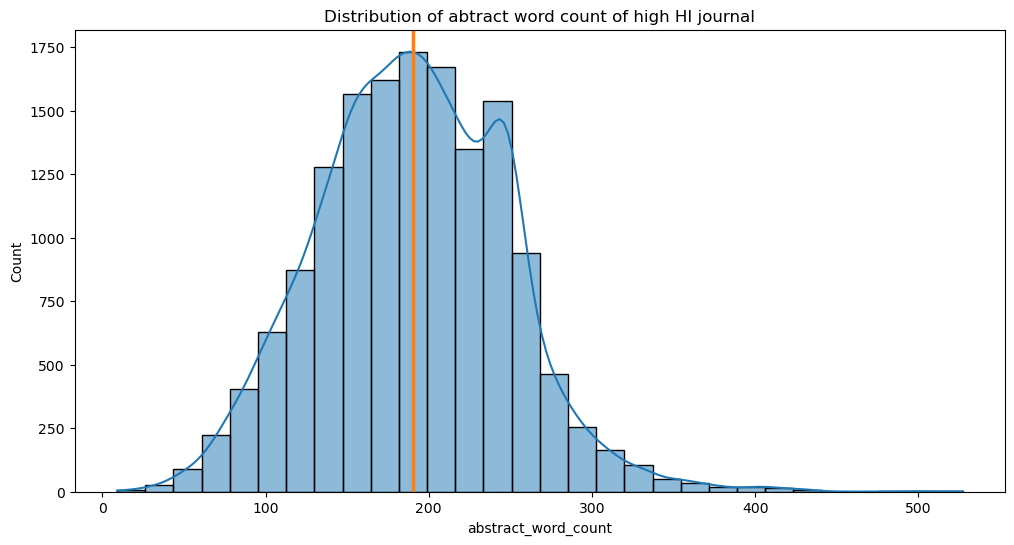

In [46]:
#single histogram of word count in high
plt.figure(figsize=(12, 6))
plt.title('Distribution of abtract word count of high HI journal')
sns.histplot(data = high_journal, x = 'abstract_word_count', bins = 30, kde = True)
plt.axvline(clean_high['abstract_word_count'].mean(), color = 'tab:orange', linestyle = '-', linewidth = 2.5);

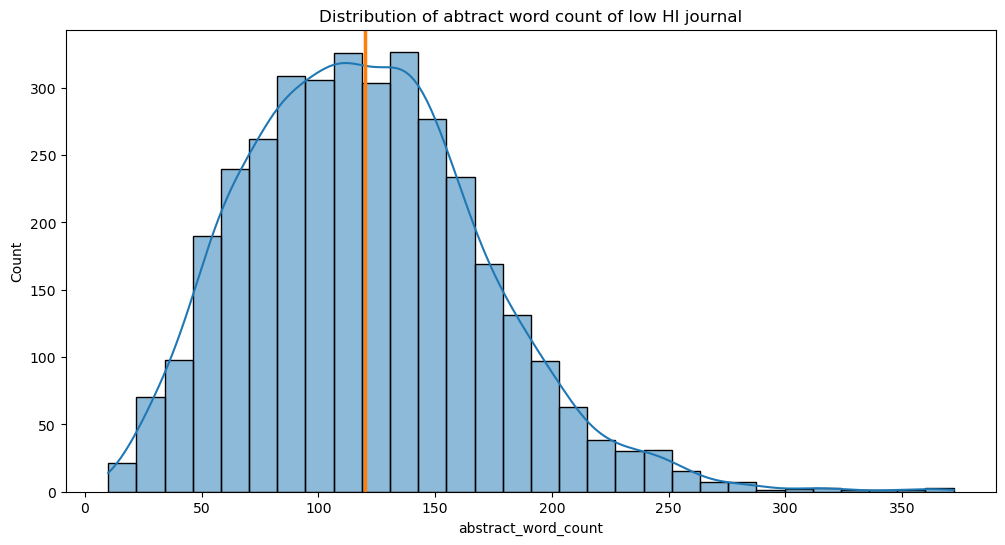

In [47]:
#single histogram of word count in low
plt.figure(figsize=(12, 6))
plt.title('Distribution of abtract word count of low HI journal')
sns.histplot(data = low_journal, x = 'abstract_word_count', bins = 30, kde = True);
plt.axvline(clean_low['abstract_word_count'].mean(), color = 'tab:orange', linestyle = '-', linewidth = 2.5);

The word count seems to be fairly normally distributed for the high HI journal but there is a abnormally high spike at around 240-250 words.

For low Hi journal, the distribution seems to be abit right tailed with a spike at aorund 140 words skewing the mean.

One thing that is apparent is that the general word count seems to be lower for the low HI jounral than the hig HI journal. But stastical calulations would be required to determine if there is indeed any difference. But for now, this is a positive sign that perhaps some difference exists between the journals, which NLP would be able to further differentiate and classify

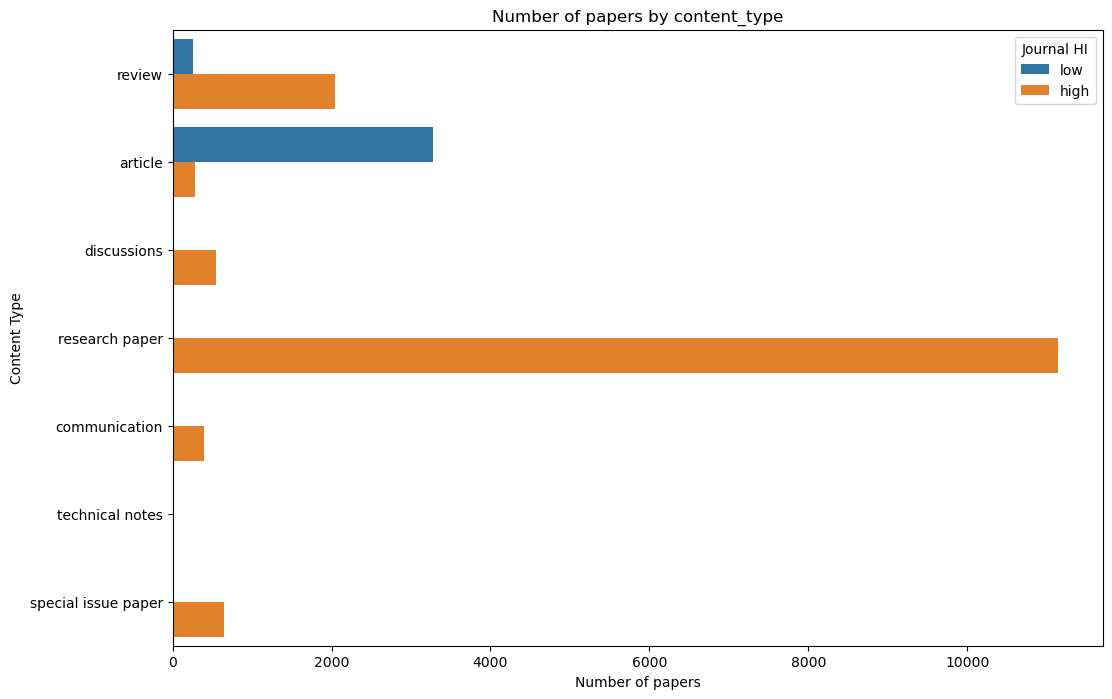

In [48]:
plt.figure(figsize = (12, 8))
sns.countplot(data = combined_df, y ='content_type', hue = 'high_HI')
plt.xlabel('Number of papers')
plt.ylabel('Content Type')
plt.title('Number of papers by content_type')
plt.legend(title = 'Journal HI', loc = 'upper right', labels = ['low', 'high'])
plt.show()

## Seaborn pairplot
* shows the distribution overlayed seperated by journal types
* shows the correlation of word counts with abstract length

<Figure size 2000x4000 with 0 Axes>

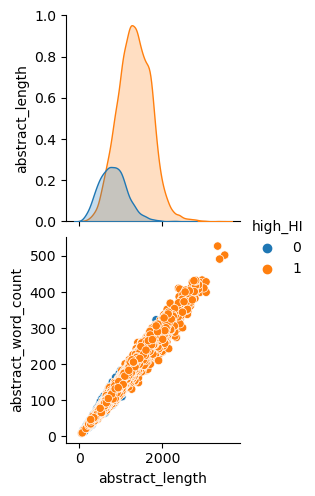

In [49]:
plt.figure(figsize = (20, 40))
sns.pairplot(data = combined_df, x_vars= 'abstract_length', hue = 'high_HI');

The data imbalance is relatively obvious with the large area of the orange curve which is the high journal. Neverthelss, it shows that is significant overlap in terms of word count and abstract length which may pose difficult in the classification later on.
Unsurprisingly, abstract length and word count are linearly correlated.

## Word frequency
As a prelude to the modelling process, the preprocessing of the text is done to allow explroations of the words in the abstract.

In [50]:
#preprocessor to remove digits and 
#to remove 2 character words (likely to be units, e.g. ml mg, ms, and other words lieklly to be english stop words e.g. he to go in by)
def preprocess_text(text):
    text = re.sub(r'\d+|\b\w{2}\b', '', text.lower()) 
    return text

In [51]:
# conversion to because "CountVectorizer object is not subscriptable" 
high_abstracts = high_journal['abstract']
low_abstracts = low_journal['abstract']

# Instantiate a CountVectorizer with the default hyperparameters.
high_cvec = CountVectorizer(stop_words = 'english', preprocessor = preprocess_text)
low_cvec = CountVectorizer(stop_words = 'english', preprocessor = preprocess_text)

# Fit the vectorizer on our corpus.
high_abs_cvec = high_cvec.fit_transform(high_abstracts)
low_abs_cvec = low_cvec.fit_transform(low_abstracts)

# pdf it.
high_cvec_df = pd.DataFrame(high_abs_cvec.todense(), columns = high_cvec.get_feature_names_out())
low_cvec_df = pd.DataFrame(low_abs_cvec.todense(), columns = low_cvec.get_feature_names_out())

In [52]:
#sort words by mean counts due to data imbalance.
common_words_high = high_cvec_df.mean().sort_values(ascending = False)[:20]
common_words_low = low_cvec_df.mean().sort_values(ascending = False)[:20]

#reframe the counts and concat for plotting
high_common_df = pd.DataFrame({'words' : common_words_high.index,
                               'counts' : common_words_high.to_list(),
                               'journal': 'high'
                              })
low_common_df = pd.DataFrame({'words' : common_words_low.index,
                              'counts' : common_words_low.to_list(),
                              'journal': 'low'
                             })
common_df_concat = pd.concat([high_common_df, low_common_df])

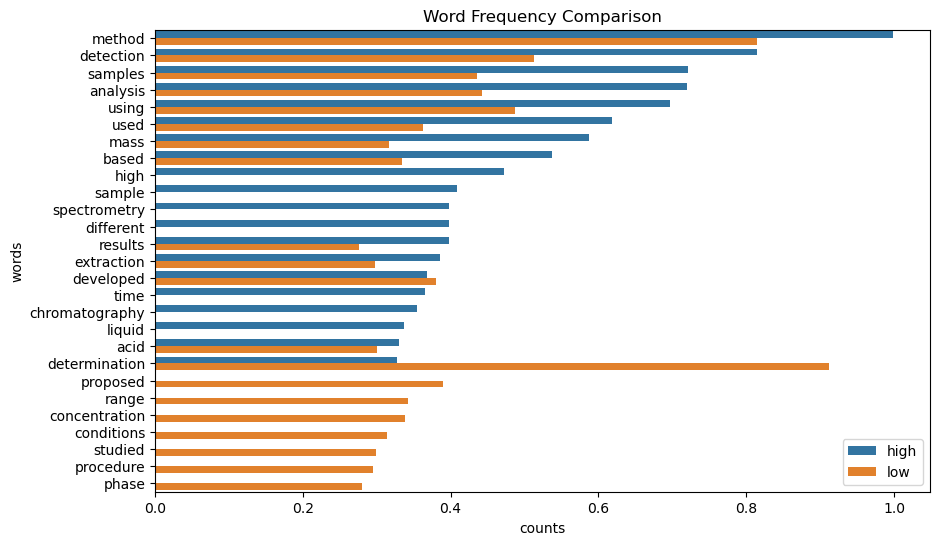

In [53]:
#plot the avg freq counts
plt.figure(figsize = (10, 6))
plt.title('Word Frequency Comparison')
sns.barplot(data = common_df_concat, y = 'words', x = 'counts', hue = 'journal')
plt.legend(loc='lower right');

From the above plot, it is now becoming obvious that between the 2 papers, there is a significant difference between the journals. Based on the the average frequency of the words present, the low_HI journal has a lower average frequency for the commons words in the top 20 most frequent words. Addtionally, there are differences between words being used that sets both journal apart. This bodes well for identifying the papers in the two journals.

## Word cloud

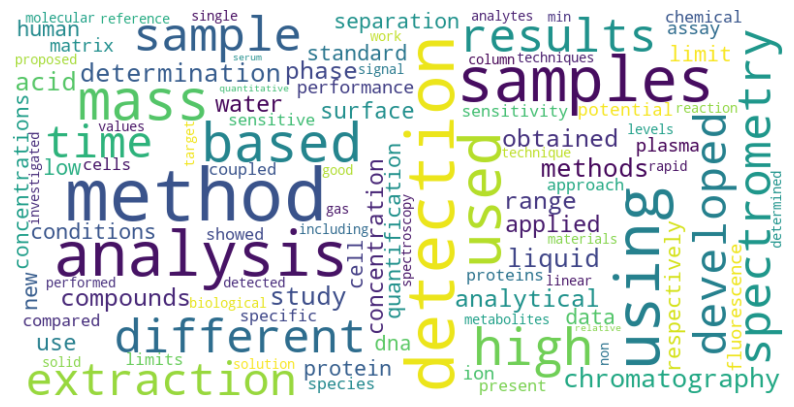

In [54]:
# lower max_font_size, change the maximum number of word and lighten the background:
high_words = high_cvec_df.sum()
wordcloud = WordCloud(max_font_size=75, max_words=100, width=800, height=400, background_color = 'rgba(255, 255, 255, 0)').generate_from_frequencies(high_words)
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("high_word_cloud.png")

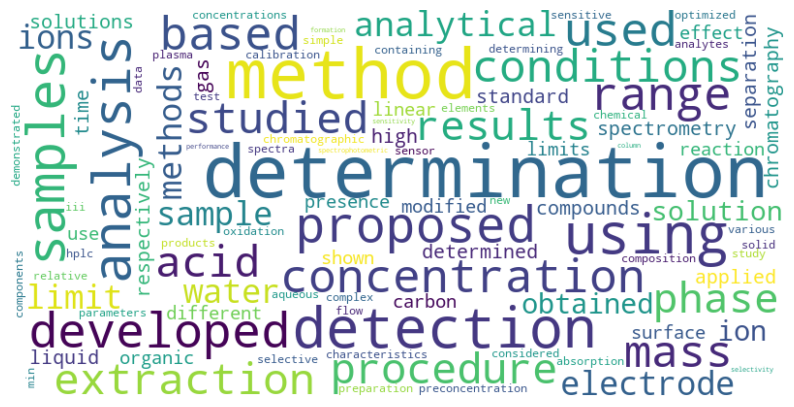

In [55]:
# lower max_font_size, change the maximum number of word and lighten the background:
low_words = low_cvec_df.sum()
wordcloud = WordCloud(max_font_size=75, max_words=100, width=800, height=400, background_color = 'rgba(255, 255, 255, 0)').generate_from_frequencies(low_words)
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("low_word_cloud.png")

# EDA summary


From the EDA done, there is not much difference between word counts and length of the abstract. The summary statistics shows outliers but removing them now may remove the key worsds that they hold as well since these represents paper that have been published regardless. In terms of the wword counts frequency, it is quite similar. However, all these are based on the counts so it does not help too much in understanding the texts. What is more relevant is the EDA done on the tokenized words. The top 20 words shows commons words used between both journals but at the same time distinct words that do not appear in each other. For example, a unique word spectrometry, chromatography and liquid appear in the high journal but not in the low journal while concentratoin and phase appear only in the low journal. This bodes well for the modelling where we are able to get the higher word order.